In [1]:
from IPython.display import Image
from PIL import Image
import numpy as np
from pandas import DataFrame
import altair as alt
alt.renderers.enable('notebook')
import cairo
from helpers import convert_to_numpy
from helpers import area_mask

1654 2340
1909 687 - 1907 1188
1822 777 - 1914 1226


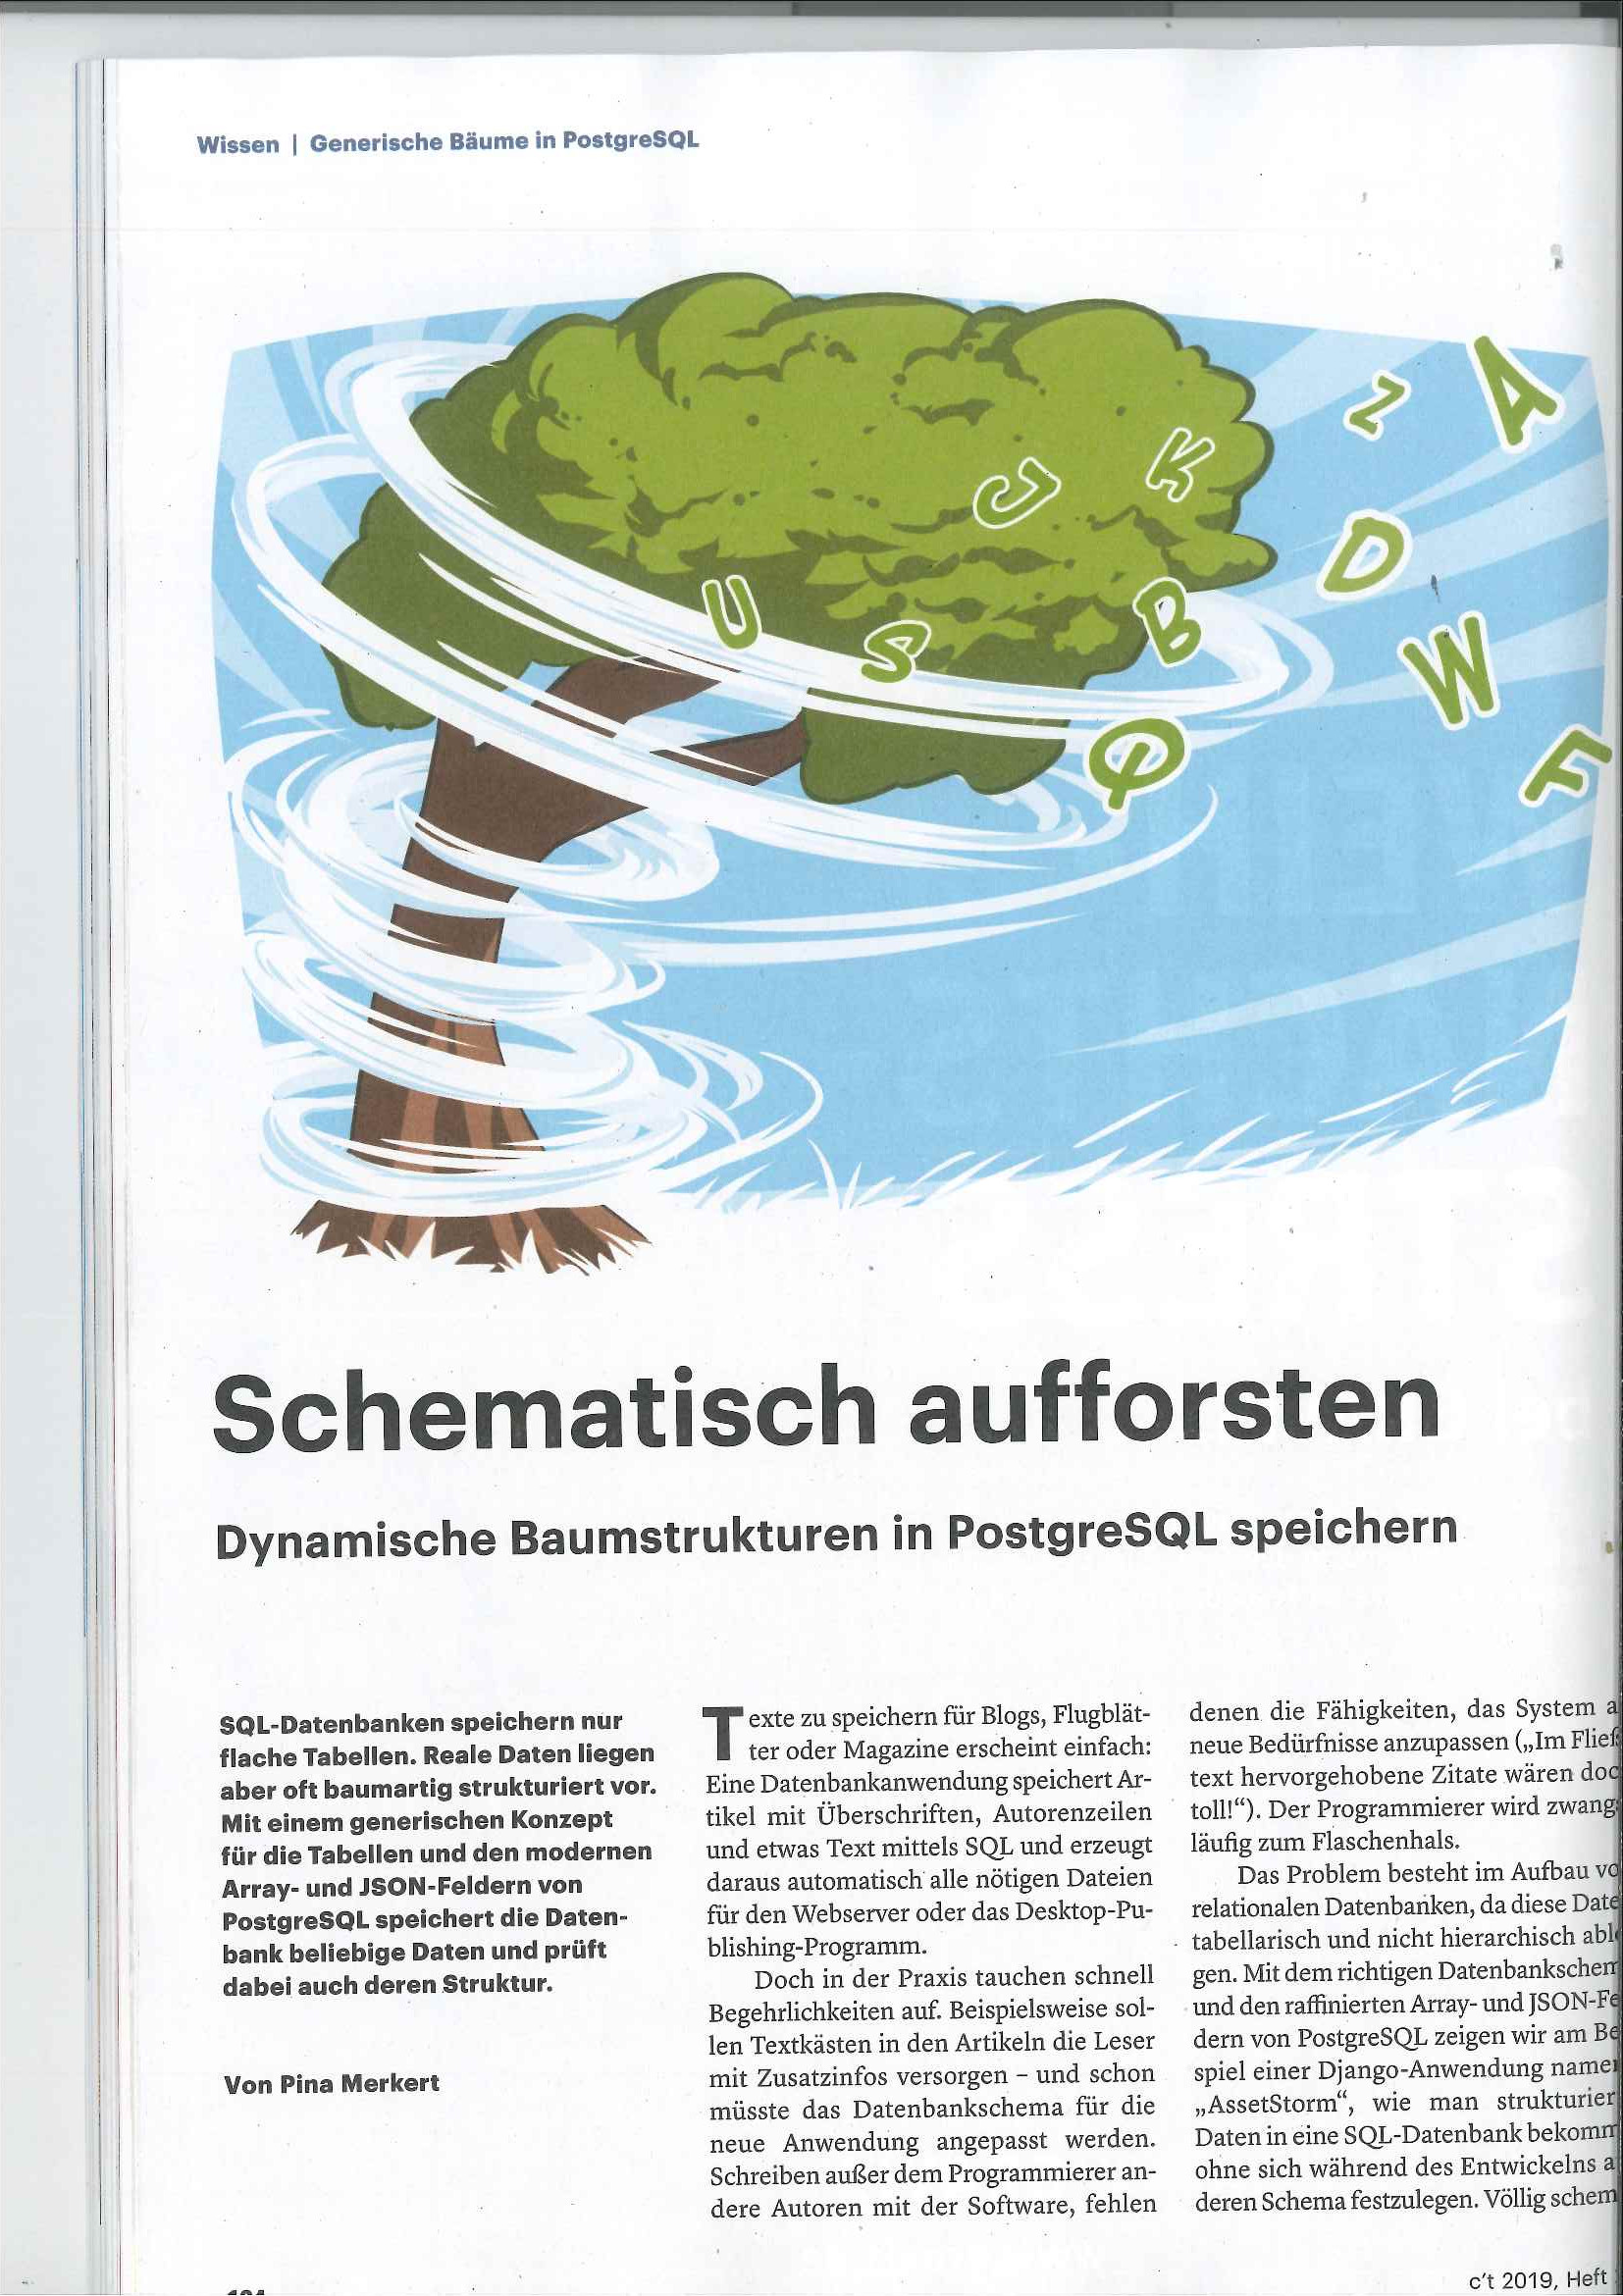

In [6]:
import random
def apply_marker(c, mask_rect):
    c.set_source_rgba(0, 0.95, 0.75, 0.35)
    c.set_line_width(41)
    mask_width = mask_rect[2] - mask_rect[0]
    mask_height = mask_rect[3] - mask_rect[1]
    x_variance = 0.7
    y_variance_pixels = 60
    start_x = round(mask_rect[0] + mask_width * (1 - x_variance) * 0.5 + random.random() * x_variance * mask_width)
    start_y = round(mask_rect[1] + (random.random() - 0.5) * y_variance_pixels)
    bezier_start_y_dist = round(random.gauss(y_variance_pixels, y_variance_pixels/2))
    bezier_start_x = round(random.gauss(start_x, x_variance * mask_width * 0.5))
    bezier_start_y = start_y + bezier_start_y_dist
    end_x = round(mask_rect[0] + mask_width * (1 - x_variance) * 0.5 + random.random() * x_variance * mask_width)
    end_y = round(mask_rect[3] - (random.random() - 0.5) * y_variance_pixels)
    bezier_end_y_dist = round(random.gauss(y_variance_pixels, y_variance_pixels/2))
    bezier_end_x = round(random.gauss(end_x, x_variance * mask_width * 0.5))
    bezier_end_y = end_y + bezier_end_y_dist
    print(start_x, start_y, "-", end_x, end_y)
    print(bezier_start_x, bezier_start_y, "-", bezier_end_x, bezier_end_y)
    c.move_to(start_x, start_y)
    c.curve_to(bezier_start_x, bezier_start_y,
               bezier_end_x, bezier_end_y,
               end_x, end_y)
    c.stroke()
    return c

img = Image.open("dataset/without_marker/20191205142548420_0001.jpg")
print(img.width, img.height)
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, img.width, img.height)
c = cairo.Context(surface)
c.set_source_rgb(1, 1, 1)
c.paint()
m_rect = 1725, 702, 1999, 1193
c = apply_marker(c, m_rect)
img_array = np.array(img, dtype=np.uint8)
img_alpha = np.ones((*img_array.shape[:2], 1), dtype=np.uint8) * 255
a = np.concatenate([img_array, img_alpha], axis=2)
b = convert_to_numpy(surface)
mix = np.minimum(a, b)
Image.fromarray(mix, 'RGBA')